**MathTools HW3** 
2024-10-21

Question 2

In [458]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

(a)

In [459]:
#Initializing parameters
sigma1 = 1.5
sigma2 = 3.5
length = 15
center = (length - 1) // 2

In [460]:
#Generate the Gaussian function
def gaussian(n, sigma):
    return np.exp(-n**2 / (2 * sigma**2))

In [461]:
#Generate Gaussians that's centered around 0
x = np.arange(length) - center
gaussian1 = gaussian(x, sigma1) #sd=1.5
gaussian2 = gaussian(x, sigma2) #sd=3.5
#Normalizing
gaussian1 /= np.sum(gaussian1)
gaussian2 /= np.sum(gaussian2)

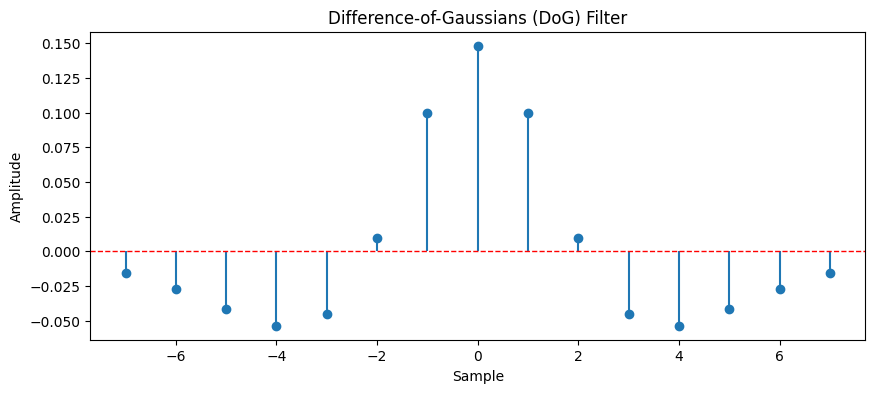

In [462]:
#Generate the DoG filter
dog_filter = gaussian1 - gaussian2

plt.figure(figsize=(10, 4))
plt.stem(x, dog_filter, basefmt=" ")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Difference-of-Gaussians (DoG) Filter")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

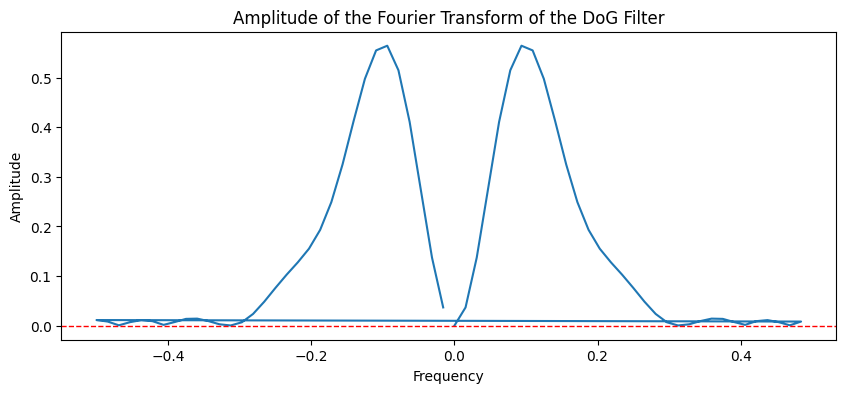

In [463]:
#Doing Fourier transform to the filter, sampled at 64 locations 
fft_dog = np.fft.fft(dog_filter, 64)
fft_amplitude = np.abs(fft_dog)

# Plot the amplitude of the Fourier transform
plt.figure(figsize=(10, 4))
plt.plot(np.fft.fftfreq(64), fft_amplitude)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Amplitude of the Fourier Transform of the DoG Filter")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()


The DoG filter acts as a band-pass filter. It only allow certain frequency in a specific range to pass through and prunning very low and high frequencies. 

The shape is determined by the standard deviation of the two choosen Gaussians. For the Gaussian with smaller sd, it forms a narrow, central peak; for the Gaussian with larger sd, it forms a broader shape. When we subtract them, the central peak remains as the difference, while the surrounding areas become negative, forming a characteristic center-surround structure. This structure reflects spatial contrast, similar to how retinal and LGN neurons respond to light patterns.

If change sd for smaller Gaussian: increasing it will increase the width of the central peak, making the filter more sensitive to lower frequencies, the ampliotude of the Fourier transform at lower frequencies increases, and the filter becomes broader. If decrease it, the filter will become more sensitive to higher frequencier, shifting the energy in the Fourier domain to higher frequencies. 
If change sd for bigger Gaussian: increasing it broadens the inhibitory region, and will lower the energy in mid-range frequencies, as the inhibitory part cancels out more of the excitatory peak. Where as decreasing the sd will make the inhibitory surround smaller and will increase the mid-range frequency components in the Fourier transform.

（b）

In [464]:
#FFT of the DoG filter
fft_dog = np.fft.fft(dog_filter, 64)
fft_amplitude = np.abs(fft_dog)

#Find the maximum amplitude
max_amplitude_index = np.argmax(fft_amplitude)
max_amplitude_frequency = np.fft.fftfreq(64)[max_amplitude_index]

In [465]:
print(f"The frequency with the largest response at {max_amplitude_index} term, and  is: {max_amplitude_frequency:.2f} cycles/sample")

#Period
period = 1 / abs(max_amplitude_frequency)
print(f"The period of this sinusoid is: {period:.2f} samples")

The frequency with the largest response at 6 term, and  is: 0.09 cycles/sample
The period of this sinusoid is: 10.67 samples


In [466]:
#25% of the maximum amplitude
threshold = 0.25 * fft_amplitude[max_amplitude_index]

#Find frequencies where the amplitude is close to 25% of the maximum
frequencies_25_percent = np.fft.fftfreq(64)[fft_amplitude >= threshold]

print("Frequencies with approximately 25% of the maximum amplitude:")
for freq in frequencies_25_percent:
    print(f"{freq:.2f} cycles/sample")

Frequencies with approximately 25% of the maximum amplitude:
0.05 cycles/sample
0.06 cycles/sample
0.08 cycles/sample
0.09 cycles/sample
0.11 cycles/sample
0.12 cycles/sample
0.14 cycles/sample
0.16 cycles/sample
0.17 cycles/sample
0.19 cycles/sample
0.20 cycles/sample
-0.20 cycles/sample
-0.19 cycles/sample
-0.17 cycles/sample
-0.16 cycles/sample
-0.14 cycles/sample
-0.12 cycles/sample
-0.11 cycles/sample
-0.09 cycles/sample
-0.08 cycles/sample
-0.06 cycles/sample
-0.05 cycles/sample


0.09 cycles/sample and 0.11 cycles/sample would produce responses with about 25% of this maximal amplitude.

(c)

In [467]:
frequencies = [0.05, 0.11, 0.20] 
N = 64 

In [468]:
#Generate the sinusoid wave
t = np.arange(N)
#sinusoids = [np.sin(2 * np.pi * freq * t) for freq in frequencies]
sinusoids = [np.cos(2 * np.pi * freq * t) for freq in frequencies]

In [469]:
#Convolution with DoG filter
responses = [np.convolve(sinusoid, dog_filter, mode='full') for sinusoid in sinusoids]

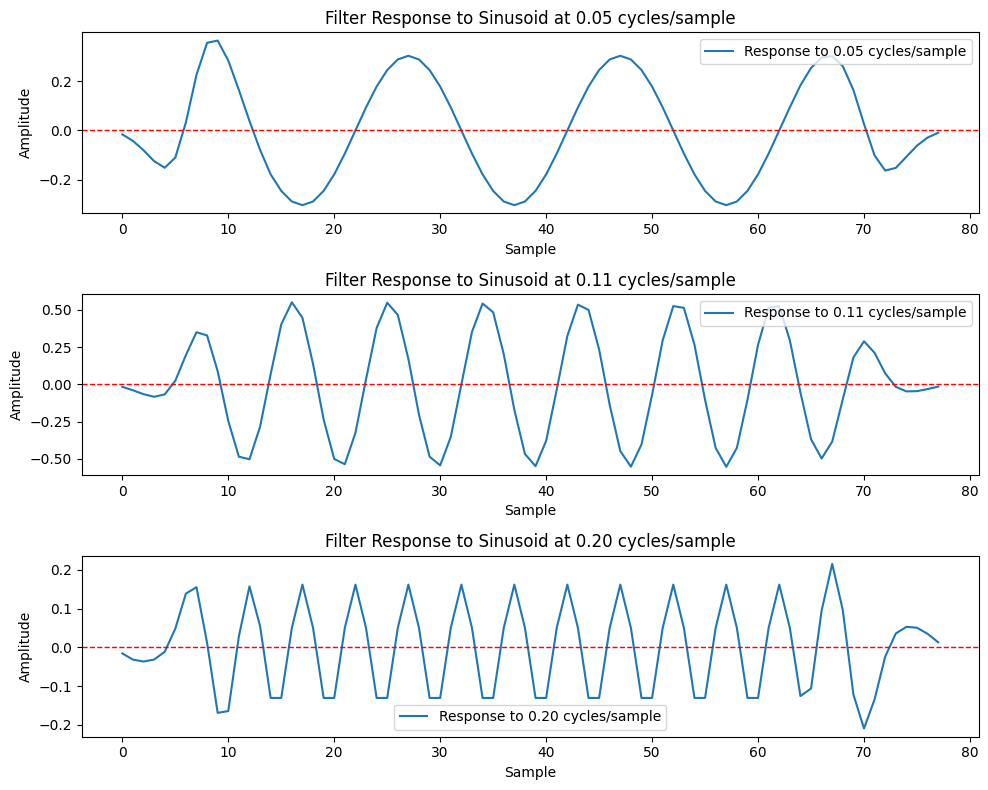

In [470]:
plt.figure(figsize=(10, 8))
for i, (sinusoid, response) in enumerate(zip(sinusoids, responses)): #enumerate(zip()) is adding index and pairing the two inputs
    plt.subplot(3, 1, i + 1)
    plt.plot(response, label=f'Response to {frequencies[i]:.2f} cycles/sample')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.title(f'Filter Response to Sinusoid at {frequencies[i]:.2f} cycles/sample')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
plt.tight_layout()
plt.show()

In [471]:
#Compute the DFT of the response and measure the amplitude at certain frequency
for i, response in enumerate(responses):
    fft_response = np.fft.fft(response, N)  # Compute the FFT of the response with 64 samples
    fft_amplitude = np.abs(fft_response)
    freq_index = int(frequencies[i] * N)  # Find the index for the desired frequency
    amplitude_at_freq = fft_amplitude[freq_index] / (N / 2)  # Normalize by (N/2) for unit-amplitude scaling
    print(f'Amplitude of response at {frequencies[i]:.2f} cycles/sample: {amplitude_at_freq:.4f}')

Amplitude of response at 0.05 cycles/sample: 0.2410
Amplitude of response at 0.11 cycles/sample: 0.4996
Amplitude of response at 0.20 cycles/sample: 0.0557


The response at the mid frequency (0.10 cycles/sample) has the highest amplitude, which is consistent with the peak amplitude expected from the frequency response of the DoG filter. The responses at the low frequency (0.05 cycles/sample) and high frequency (0.20 cycles/sample) are approximately 25% of the peak amplitude, as predicted in part (b).

(d)

In [472]:
#Generate the DoG filter
#dog_filter = gaussian1 - gaussian2
dog_filter_extended = np.zeros(64) 
dog_filter_extended[:len(dog_filter)] = dog_filter #to make the first 15 values to be the same as teh old DoG filter and make remain to be zero

In [473]:
#convolution in time domain
time_domain_convolutions = [np.convolve(sinusoid, dog_filter_extended, mode='same') for sinusoid in sinusoids]
#time_domain_convolutions = [
#    np.convolve(np.concatenate([sinusoid, sinusoid[:15]]), dog_filter_extended, mode='same')
#    for sinusoid in sinusoids
#]

In [474]:
#fft 
fft_filter = np.fft.fft(dog_filter_extended, N)  
fft_sinusoids = [np.fft.fft(sinusoid) for sinusoid in sinusoids]  # FFT of each sinusoidal stimulus

#Multiplying the stimuli
fft_products = [fft_sinusoid * np.conj(fft_filter) for fft_sinusoid in fft_sinusoids]
#Transfering to time domain, inverse fourier transform
ifft_results = [np.fft.ifft(fft_product) for fft_product in fft_products]


Frequency 0.05 cycles/sample:
Imaginary part max value: 0.0000
Imaginary part is approximately zero.
The real part does not match the time-domain convolution result.

Frequency 0.11 cycles/sample:
Imaginary part max value: 0.0000
Imaginary part is approximately zero.
The real part does not match the time-domain convolution result.

Frequency 0.20 cycles/sample:
Imaginary part max value: 0.0000
Imaginary part is approximately zero.
The real part does not match the time-domain convolution result.


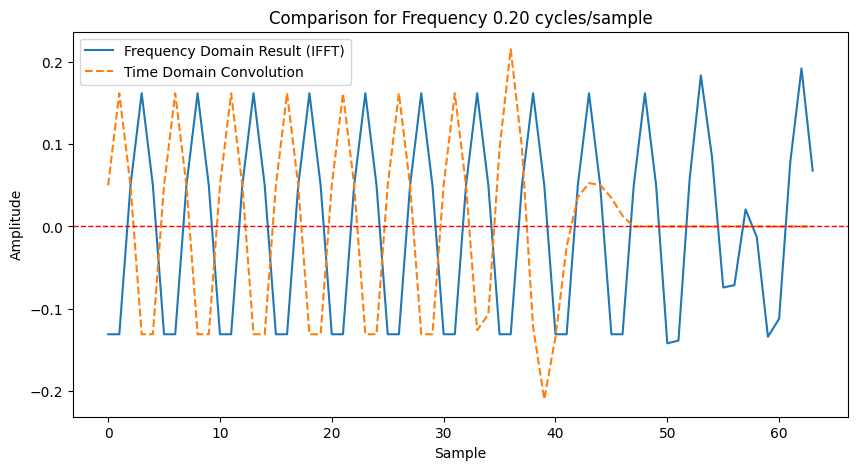

In [475]:
#verify that the imaginary part is zero, and the real part is equal to the result you obtain from the convolution.
for i, (response, ifft_result) in enumerate(zip(time_domain_convolutions, ifft_results)):
    print(f"\nFrequency {frequencies[i]:.2f} cycles/sample:")
    print(f"Imaginary part max value: {np.max(np.abs(np.imag(ifft_result))):.4f}")

    # Verify if the imaginary part is approximately zero
    if np.allclose(np.imag(ifft_result), 0, atol=1e-10): #setting an absolute tolerance
        print("Imaginary part is approximately zero.")
    else:
        print("Imaginary part is not exactly zero but very close.")

    # Verify if the real part matches the time-domain convolution result
    real_part = np.real(ifft_result)
    if np.allclose(real_part, response, atol=1e-4):
        print("The real part matches the time-domain convolution result.")
    else:
        print("The real part does not match the time-domain convolution result.")

#Just checking 
plt.figure(figsize=(10, 5))
plt.plot(np.real(ifft_results[2]), label='Frequency Domain Result (IFFT)')
plt.plot(time_domain_convolutions[2], '--', label='Time Domain Convolution')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title(f'Comparison for Frequency {frequencies[2]:.2f} cycles/sample')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()